In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mercari-price-suggestion-challenge/train.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/test.tsv.7z
/kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip
/kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
/kaggle/input/mercari-price-suggestion-challenge/sample_submission.csv.7z


In [6]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

In [7]:
!p7zip -d -f -k ../input/mercari-price-suggestion-challenge/train.tsv.7z
!p7zip -d -f -k ../input/mercari-price-suggestion-challenge/test.tsv.7z
!unzip -o -d /kaggle/working/ /kaggle/input/mercari-price-suggestion-challenge/test_stg2.tsv.zip
!p7zip -d -f -k ../input/mercari-price-suggestion-challenge/sample_submission.csv.7z
!unzip -o -d /kaggle/working/ /kaggle/input/mercari-price-suggestion-challenge/sample_submission_stg2.csv.zip


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C,Utf16=off,HugeFiles=on,64 bits,4 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan ../input/mercari-price-suggestion-challeng                                                    1 file, 77912192 bytes (75 MiB)

Extracting archive: ../input/mercari-price-suggestion-challenge/train.tsv.7z
--
Path = ../input/mercari-price-suggestion-challenge/train.tsv.7z
Type = 7z
Physical Size = 77912192
Headers Size = 122
Method = LZMA2:24
Solid = -
Blocks = 1

      3% - train.t                7% - train.t               11% - train.t               16% - train.t               19% - train.t               23% - train.t               28% - train.t               32% - train.t               36% - train.t               39% - train.t               42% - train.t               45% - train.t               50% - train.t               55% - train.t               59

In [8]:
dir_path = '/kaggle/working'
train = pd.read_csv(f'{dir_path}/train.tsv', delimiter='\t')
test  = pd.read_csv(f'{dir_path}/test.tsv', delimiter='\t')

In [9]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [10]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


In [13]:
train.shape

(1482535, 8)

In [14]:
test.shape

(693359, 7)

In [15]:
train.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [16]:
df = pd.DataFrame(train)

In [17]:
train.isnull().sum()  #브랜드 카테고리 설명 결측치 

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          6
dtype: int64

In [18]:
(df['price'] <= 0).sum() # 가격이 0이거나 0보다 적으면 이상치 

874

# 데이터 전처리
### 결측치

In [19]:
df['category_name'] = df['category_name'].fillna('Unknown/Unknown/Unknown')
df[['category1', 'category2', 'category3']] = df['category_name'].str.split('/', n=2, expand=True)
df[['category1', 'category2', 'category3']] = df[['category1', 'category2', 'category3']].fillna('Unknown')
df = df.drop(columns=['category_name'])

In [20]:
df['brand_name'] = df['brand_name'].fillna('No Brand')
df['item_description'] = df['item_description'].fillna('No description')
df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
brand_name           0
price                0
shipping             0
item_description     0
category1            0
category2            0
category3            0
dtype: int64

### 이상치

In [21]:
df = df[df['price']>0]

# 피처 엔지니어링

### Missing

In [22]:
from scipy import stats

# 'missing' 포함 여부에 따라 새로운 열 생성
df['has_missing_desc'] = df['item_description'].str.contains('missing', case=False, na=False)

In [23]:
# 기술 통계량 계산
missing_stats = df[df['has_missing_desc']]['price'].describe()
non_missing_stats = df[~df['has_missing_desc']]['price'].describe()
print("Statistics for items with 'missing' in item description:")
print(missing_stats)
print("\nStatistics for items without 'missing' in item description:")
print(non_missing_stats)

Statistics for items with 'missing' in item description:
count    10531.000000
mean        30.922799
std         43.897089
min          3.000000
25%         12.000000
50%         20.000000
75%         34.000000
max       1000.000000
Name: price, dtype: float64

Statistics for items without 'missing' in item description:
count    1.471130e+06
mean     2.672344e+01
std      3.854976e+01
min      3.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64


In [24]:
# 평균 가격 차이 계산
price_diff = missing_stats['mean'] - non_missing_stats['mean']
print(f"\nMean price difference: {price_diff:.2f}")


Mean price difference: 4.20


In [25]:
# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(df[df['has_missing_desc']]['price'], 
                                  df[~df['has_missing_desc']]['price'])
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 11.1273
P-value: 0.0000


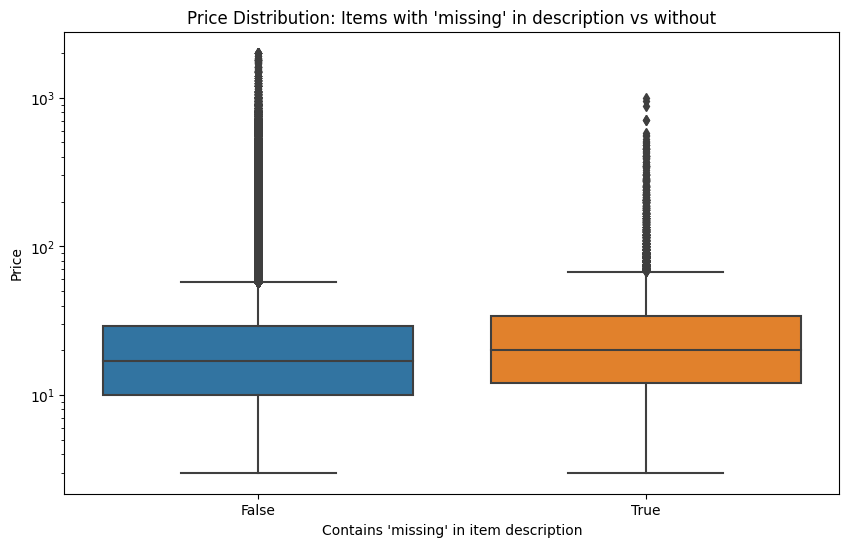

In [26]:
# 박스플롯 생성
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_missing_desc', y='price', data=df)
plt.title("Price Distribution: Items with 'missing' in description vs without")
plt.xlabel("Contains 'missing' in item description")
plt.ylabel("Price")
plt.yscale('log')  # 로그 스케일 사용 (가격 범위가 넓을 경우)
plt.show()


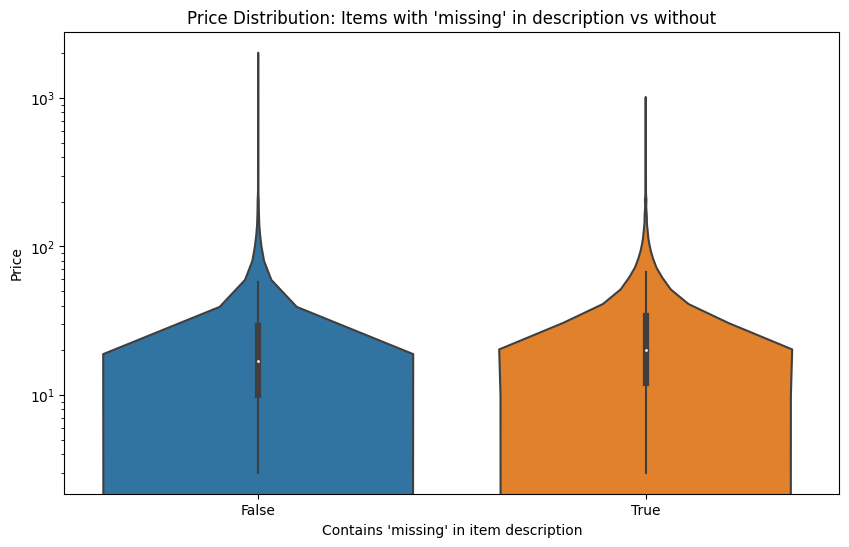

In [27]:
# 바이올린 플롯 생성
plt.figure(figsize=(10, 6))
sns.violinplot(x='has_missing_desc', y='price', data=df)
plt.title("Price Distribution: Items with 'missing' in description vs without")
plt.xlabel("Contains 'missing' in item description")
plt.ylabel("Price")
plt.yscale('log')  # 로그 스케일 사용 (가격 범위가 넓을 경우)
plt.show()


In [28]:
# 상관관계 분석 (Point-Biserial Correlation)
correlation, _ = stats.pointbiserialr(df['has_missing_desc'], df['price'])
print(f"\nPoint-Biserial Correlation between 'missing' in item description and price: {correlation:.4f}")



Point-Biserial Correlation between 'missing' in item description and price: 0.0091


In [29]:
# 'missing'이 포함된 항목과 포함되지 않은 항목의 수 확인
missing_count = df['has_missing_desc'].sum()
non_missing_count = (~df['has_missing_desc']).sum()
print(f"\nNumber of items with 'missing' in description: {missing_count}")
print(f"Number of items without 'missing' in description: {non_missing_count}")


Number of items with 'missing' in description: 10531
Number of items without 'missing' in description: 1471130


### Bundle

In [30]:
# 'bundle' 포함 여부를 확인하는 함수
def contains_bundle(text):
    if isinstance(text, str):
        return 'bundle' in text.lower()
    return False

# name 열에서 'bundle' 포함 여부 확인
df['name_has_bundle'] = df['name'].apply(contains_bundle)

# item_description 열에서 'bundle' 포함 여부 확인
df['description_has_bundle'] = df['item_description'].apply(contains_bundle)

# 결과 계산
name_bundle_count = df['name_has_bundle'].sum()
name_bundle_ratio = name_bundle_count / len(df) * 100

desc_bundle_count = df['description_has_bundle'].sum()
desc_bundle_ratio = desc_bundle_count / len(df) * 100


In [31]:
print(f"\nItems with 'bundle' in name: {name_bundle_count}")
print(f"\nItems with 'bundle' in item description: {desc_bundle_count}")
# 'bundle'이 포함된 예시 출력
print("\nExample items with 'bundle' in name:")
print(df[df['name_has_bundle']]['name'].head())

print("\nExample items with 'bundle' in item description:")
print(df[df['description_has_bundle']]['item_description'].head())


Items with 'bundle' in name: 78639

Items with 'bundle' in item description: 129008

Example items with 'bundle' in name:
5         Bundled items requested for Ruie
7     Girls cheer and tumbling bundle of 7
29                           Kendra bundle
80                    Maternity top bundle
82                          Mascara Bundle
Name: name, dtype: object

Example items with 'bundle' in item description:
39     Victoria secret 34 c corest top Will bundle to...
43     Great quality!!! Fast free shipping!! You can ...
48     Perfect condition! Super comfy, let me know if...
52     Bundle for "Carl's Collectibles". Year: 2000 M...
114    Bundle for Kesha: Sperry Top Slider Shoes Wome...
Name: item_description, dtype: object


### Brand Searching

In [32]:
import re

# 브랜드 목록 생성 (알려진 브랜드들의 리스트)
known_brands = set(df[df['brand_name'] != 'No brand']['brand_name'].unique())

# 브랜드 추출 함수
def extract_brand(text, brands):
    if isinstance(text, str):
        # 텍스트를 소문자로 변환
        text_lower = text.lower()
        # 브랜드 이름이 텍스트에 포함되어 있는지 확인
        for brand in brands:
            if brand.lower() in text_lower:
                return brand
    return None

# name과 item_description에서 브랜드 추출
df['extracted_brand_from_name'] = df['name'].apply(lambda x: extract_brand(x, known_brands))
df['extracted_brand_from_desc'] = df['item_description'].apply(lambda x: extract_brand(x, known_brands))

# Unknown 브랜드 업데이트
def update_unknown_brand(row):
    if row['brand_name'] == 'No brand':
        if row['extracted_brand_from_name'] is not None:
            return row['extracted_brand_from_name']
        elif row['extracted_brand_from_desc'] is not None:
            return row['extracted_brand_from_desc']
    return row['brand_name']

df['updated_brand'] = df.apply(update_unknown_brand, axis=1)

# 결과 확인
print("Original Unknown brand count:", (df['brand_name'] == 'No brand').sum())
print("Updated Unknown brand count:", (df['updated_brand'] =='No brand').sum())

# 업데이트된 브랜드 예시 출력
print("\nExample of updated brands:")
print(df[df['brand_name'] != df['updated_brand']].head())

# 브랜드별 상품 수 확인
print("\nTop 10 brands after update:")
print(df['updated_brand'].value_counts().head(10))

Original Unknown brand count: 0
Updated Unknown brand count: 0

Example of updated brands:
Empty DataFrame
Columns: [train_id, name, item_condition_id, brand_name, price, shipping, item_description, category1, category2, category3, has_missing_desc, name_has_bundle, description_has_bundle, extracted_brand_from_name, extracted_brand_from_desc, updated_brand]
Index: []

Top 10 brands after update:
updated_brand
No Brand             632336
PINK                  54072
Nike                  54006
Victoria's Secret     48011
LuLaRoe               30995
Apple                 17314
FOREVER 21            15178
Nintendo              14998
Lululemon             14550
Michael Kors          13916
Name: count, dtype: int64


# EDA

In [33]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.2 MB/s eta 0:00:0000:0100:01


In [34]:
import matplotlib.font_manager as fm
import os

# 한글 폰트 다운로드 (나눔고딕)
!wget "https://github.com/googlefonts/nanum-gothic/blob/main/fonts/NanumGothic-Regular.ttf?raw=true" -O NanumGothic-Regular.ttf

# 폰트 경로 설정
font_path = 'NanumGothic-Regular.ttf'

# 폰트 프로퍼티 설정
font_prop = fm.FontProperties(fname=font_path, size=10)

--2024-07-22 21:33:51--  https://github.com/googlefonts/nanum-gothic/blob/main/fonts/NanumGothic-Regular.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-07-22 21:33:51 ERROR 404: Not Found.



### Price

In [35]:
df['price'].describe()

count    1.481661e+06
mean     2.675329e+01
std      3.859198e+01
min      3.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

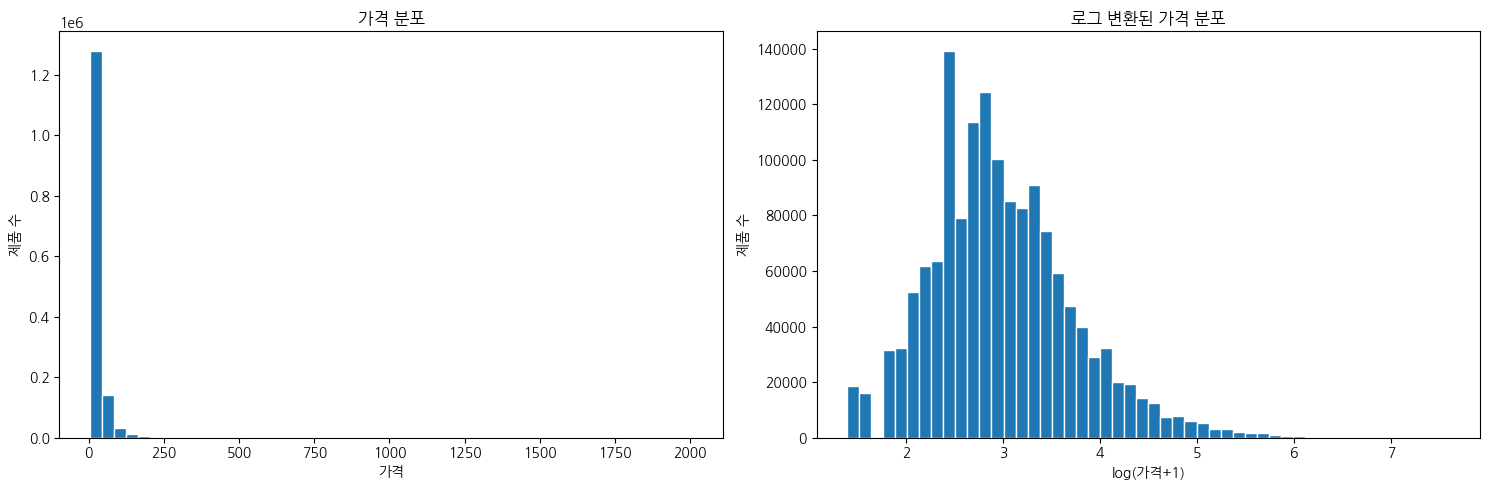

In [36]:
plt.figure(figsize=(15,5))

# 첫 번째 서브플롯: 가격 분포
plt.subplot(1,2,1)
plt.hist(df['price'], bins=50 , edgecolor='white')  # range=[0,200]
plt.title('가격 분포')
plt.xlabel('가격')
plt.ylabel("제품 수")

# 두 번째 서브플롯: 로그 변환된 가격 분포
plt.subplot(1,2,2)
log_price = np.log(df['price']+1)
plt.hist(log_price, bins=50, edgecolor='white')
plt.title("로그 변환된 가격 분포")
plt.xlabel("log(가격+1)")
plt.ylabel("제품 수")

plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()

### Category

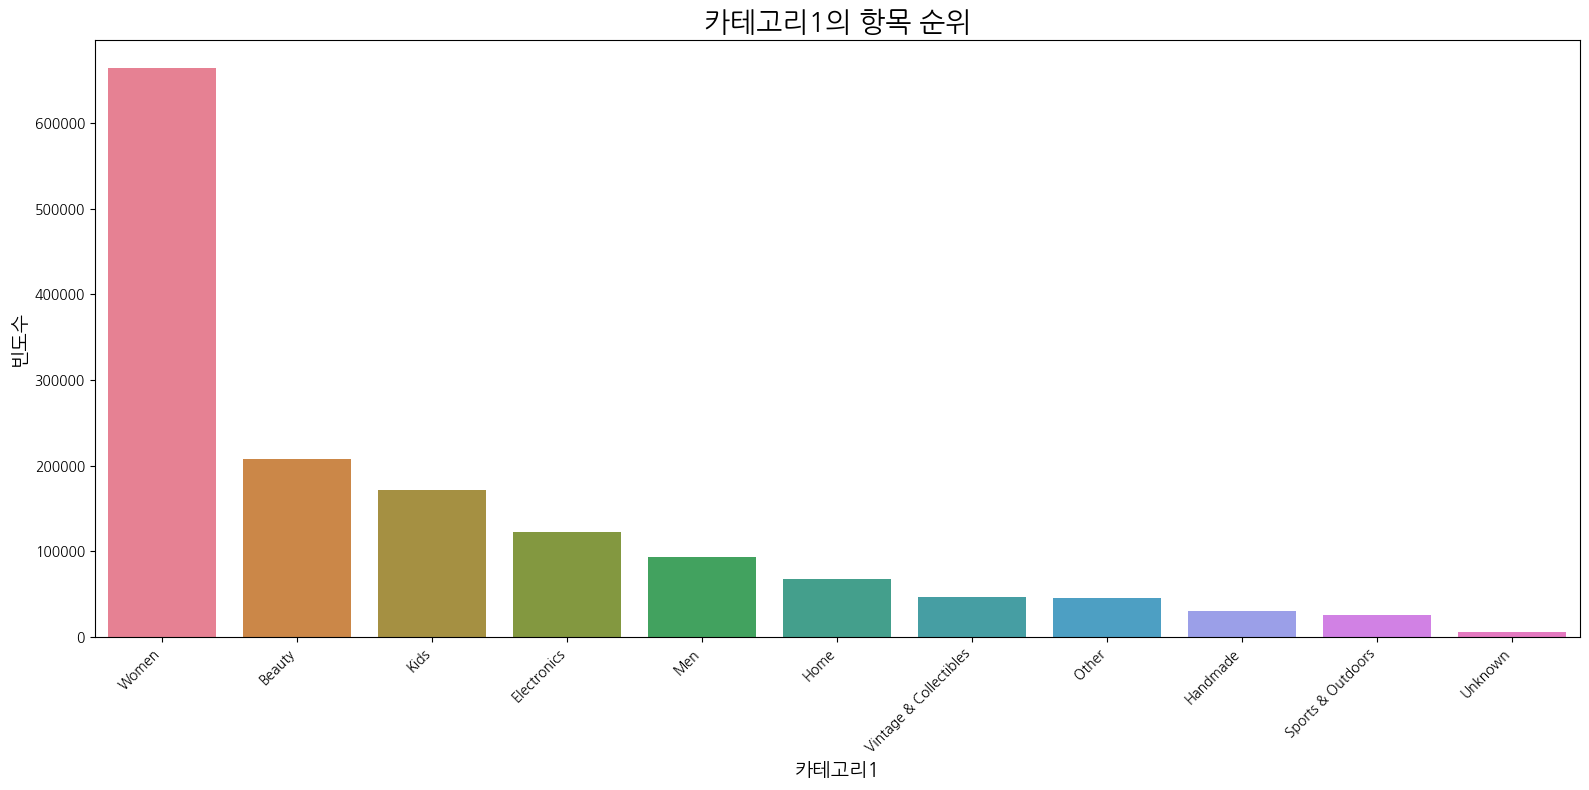

In [37]:
# category1의 빈도수 계산
count = df['category1'].value_counts()

# 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['category1', 'count']

plt.figure(figsize=(16, 8))
sns.barplot(x='category1', y='count', data=count_df, palette='husl')
plt.title("카테고리1의 항목 순위", fontsize=20)
plt.xlabel('카테고리1', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

- 상위 3개의 카테고리가 여성, 뷰티, 아동인 것을 알 수 있다. 

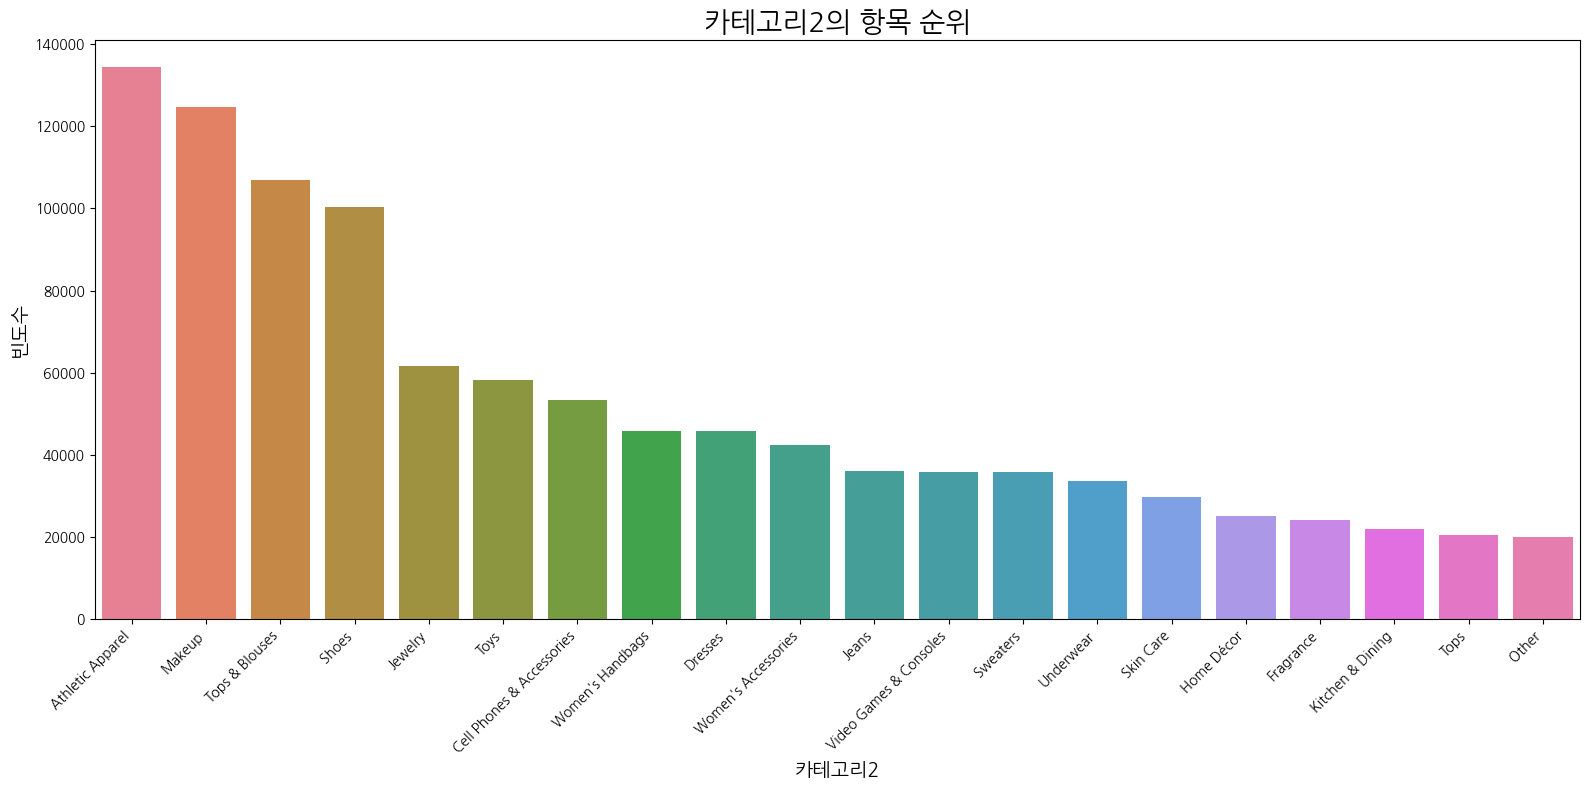

In [38]:
# category2의 빈도수 계산
count = df['category2'].value_counts()

# 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['category2', 'count']
top_20_count_df = count_df.head(20)


plt.figure(figsize=(16, 8))
sns.barplot(x='category2', y='count', data=top_20_count_df, palette='husl')
plt.title("카테고리2의 항목 순위", fontsize=20)
plt.xlabel('카테고리2', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

- 거의 140만 개의 제품이 운동복.
- 운동복, 화장품, 그리고 상의와 블라우스가 가장 많이 반복되는 세 가지 하위 카테고리

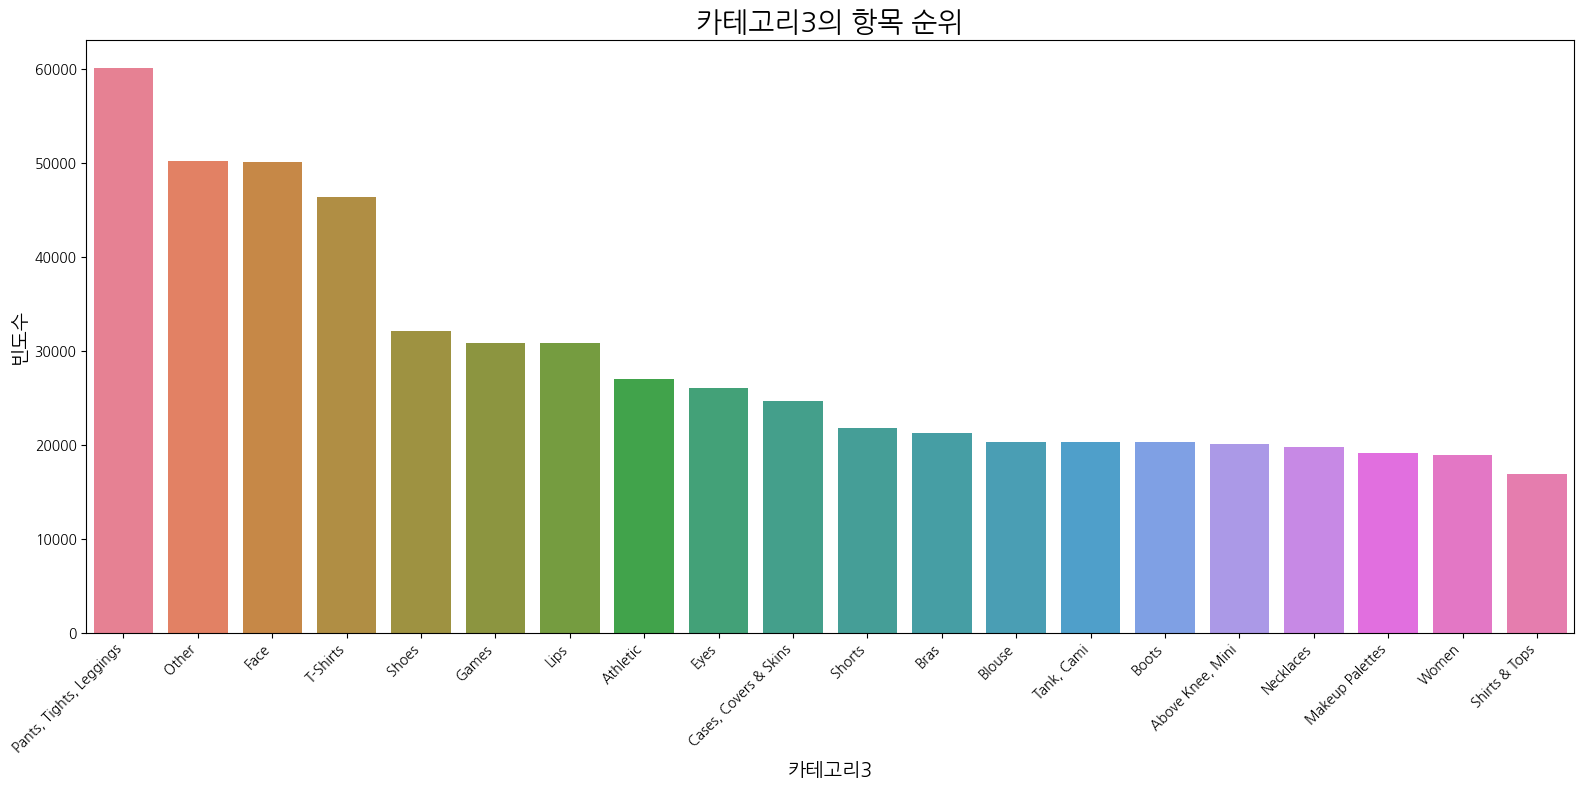

In [39]:
# category3의 빈도수 계산
count = df['category3'].value_counts()

# 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['category3', 'count']
top_20_count_df = count_df.head(20)

plt.figure(figsize=(16, 8))
sns.barplot(x='category3', y='count', data=top_20_count_df, palette='husl')
plt.title("카테고리3의 항목 순위", fontsize=20)
plt.xlabel('카테고리3', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

- 바지, 타이츠, 레깅스, 얼굴, 그리고 기타 카테고리가 하위 카테고리 레벨3에서 가장 많이 반복되는 세 가지 항목.

- 데이터셋에는 화장품, 드레스 및 여성 관련 액세서리와 같이 여성과 관련된 제품이 가장 많이 포함되어 있음.

### Brand

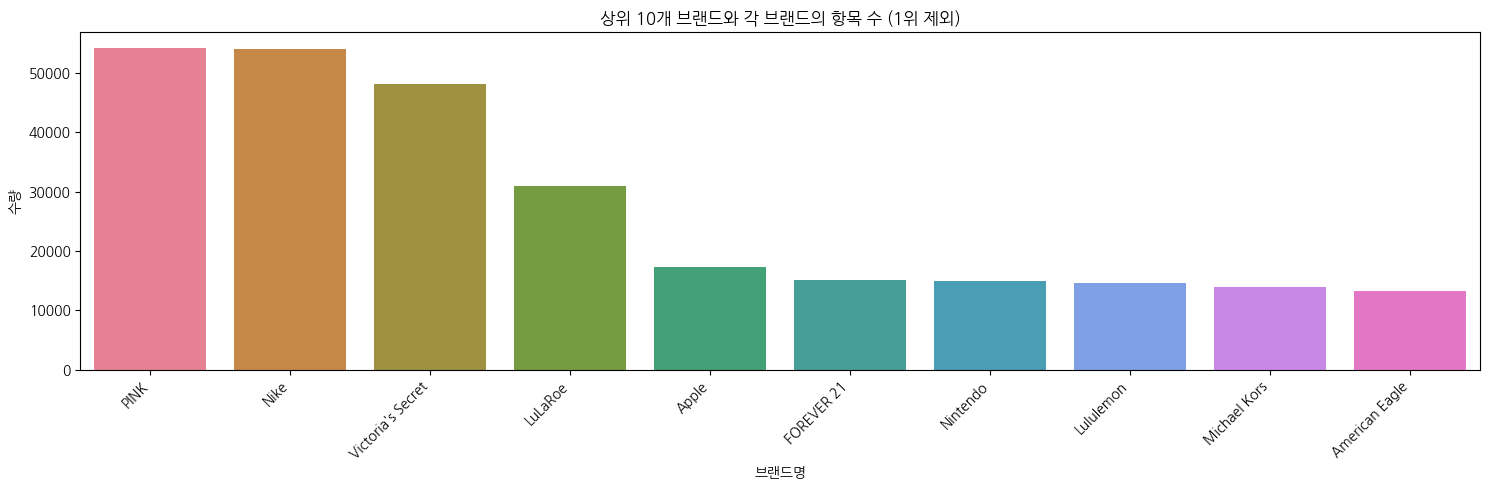

In [40]:
brands =df['brand_name'].value_counts()
top_10_brands_excluding_first = brands[1:11]

# 상위 1개 브랜드를 제외한 상위 10개 브랜드의 빈도수 막대 그래프
plt.figure(figsize=(15, 5))
sns.barplot(x=top_10_brands_excluding_first.index, y=top_10_brands_excluding_first.values, palette='husl')
plt.title('상위 10개 브랜드와 각 브랜드의 항목 수 (1위 제외)')
plt.xlabel('브랜드명')
plt.ylabel('수량')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [41]:
#가장 비싼 브랜드 찾기
brand_median_price = df.groupby('brand_name')['price'].median().reset_index()

top_25_brands = brand_median_price.sort_values(by='price', ascending=False).head(25)

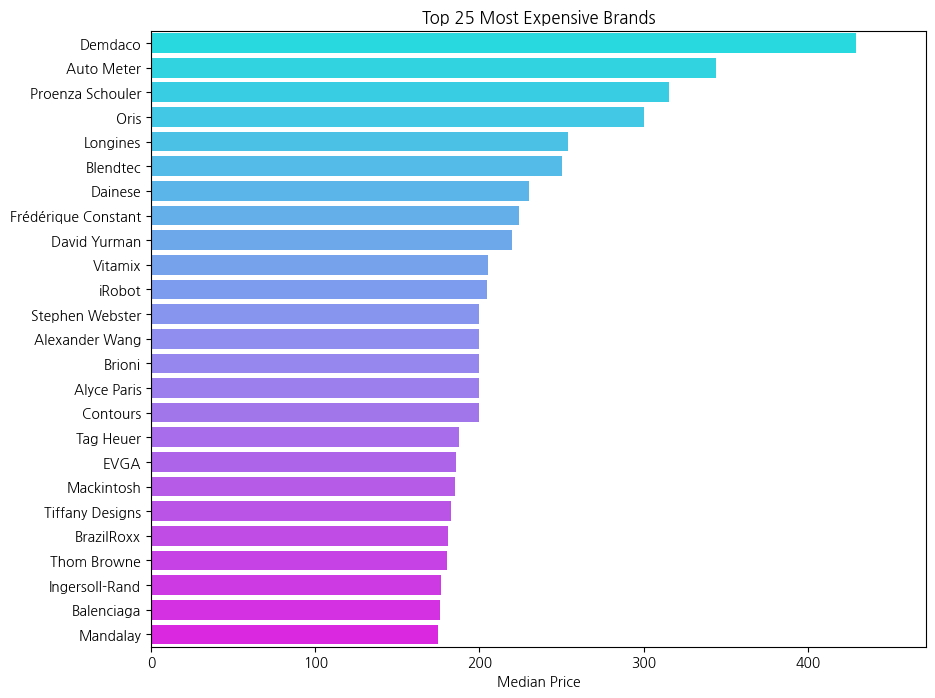

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_25_brands,
    x='price',
    y='brand_name',
    palette='cool'
)
plt.xlabel('Median Price')
plt.ylabel('')
plt.title('Top 25 Most Expensive Brands')
plt.xlim(0, top_25_brands['price'].max() * 1.1)
plt.show()

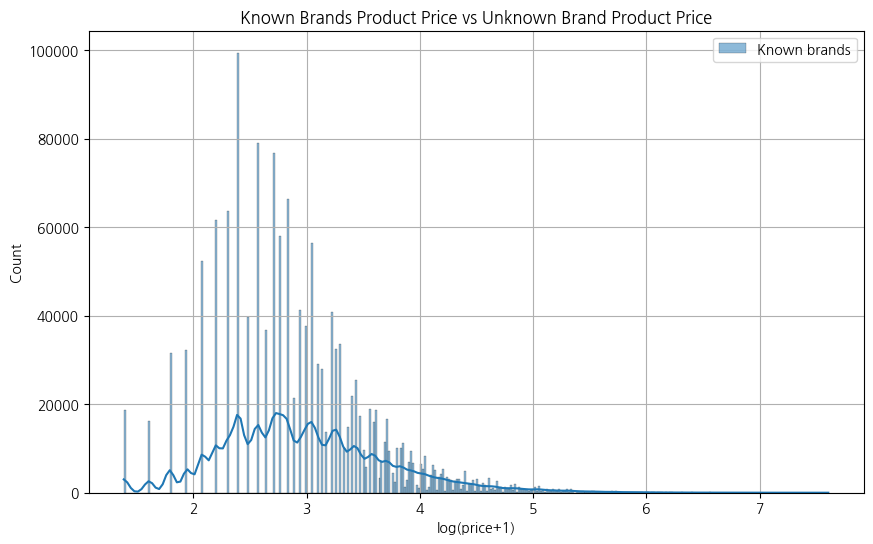

In [43]:
# 'Unknown' 브랜드와 그 외의 브랜드 구분
known_brand = np.log(df.loc[df['brand_name']!='No brand', 'price']+1)
unknown_brand = np.log(df.loc[df['brand_name']=='No brand', 'price']+1)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.histplot(known_brand, kde=True, label='Known brands')
sns.histplot(unknown_brand, kde=True, label='Unknown brand')

plt.title('Known Brands Product Price vs Unknown Brand Product Price')
plt.xlabel('log(price+1)')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

### Item Condition

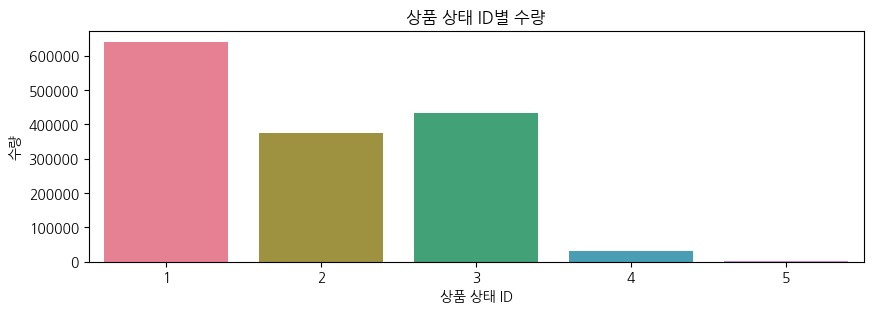

In [44]:
# item_condition_id 별 빈도수 계산
count = df['item_condition_id'].value_counts()

# 상위 5개 항목으로 제한
count = count.head(5)

# 상위 5개 항목을 데이터프레임으로 변환
count_df = count.reset_index()
count_df.columns = ['item_condition_id', 'count']

plt.figure(figsize=(10, 3))
sns.barplot(x='item_condition_id', y='count', data=count_df,  palette='husl')
plt.title('상품 상태 ID별 수량')
plt.xlabel('상품 상태 ID')
plt.ylabel('수량')
plt.show()

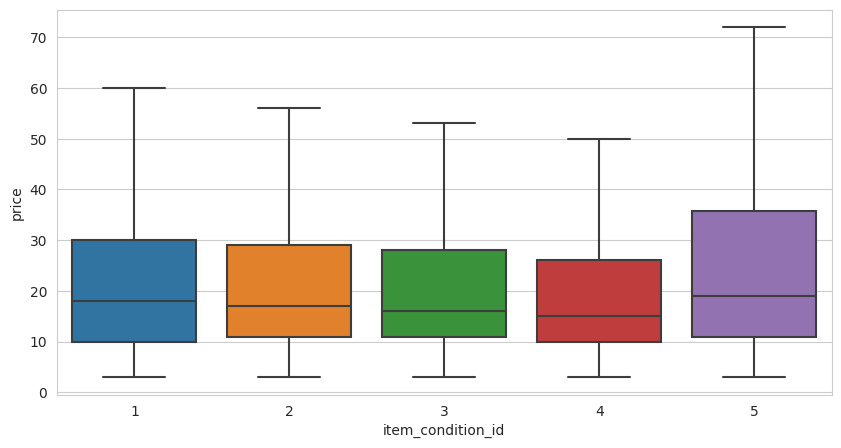

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 5))
sns.boxplot(x='item_condition_id', y='price', data=df, showfliers=False)
plt.show()
     

- 위의 그림은 다양한 아이템 상태 ID의 가격에 대한 사분위 범위를 나타내며, 모든 아이템 상태 ID에 대해 범위가 거의 비슷함. 단, ID 5만 다소 높은 범위를 가지고 있다.

### Shipping

<Axes: xlabel='shipping', ylabel='count'>

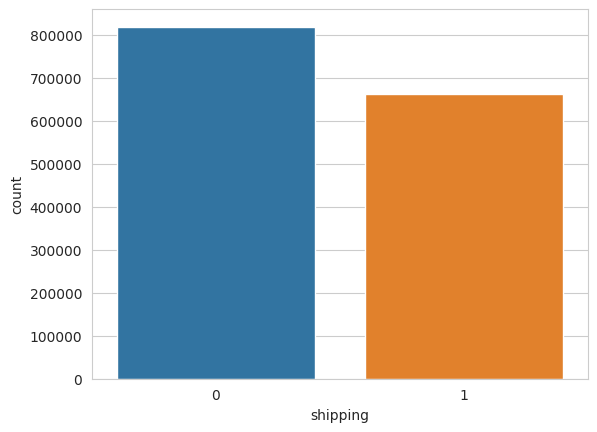

In [46]:
sns.countplot(x='shipping', data=df)

- 그림은 배송비가 판매자 또는 구매자 중 누구에 의해 지불되는지를 나타냄. 
- 배송 카테고리가 0인 예시 수가 배송 카테고리가 1인 예시 수보다 다소 많음.

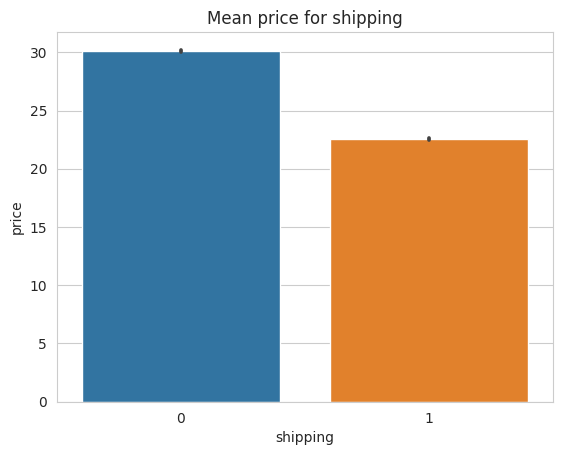

In [47]:
sns.barplot(x='shipping', y='price', data=df)
plt.title('Mean price for shipping')
plt.show()

- 배송 카테고리가 0인 예시들의 평균 가격이 배송 카테고리가 1인 예시들의 평균 가격보다 높다.

# Text Analysis

In [48]:
import re

# 자주 사용되는 정규 표현식 패턴을 미리 컴파일
HTML_CLEANER = re.compile('<.*?>')
EMAIL_CLEANER = re.compile(r'\S*@\S*\s?')
URL_CLEANER = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
PARENTHESES_CLEANER = re.compile(r"[\(\[].*?[\)\]]")
WORD_COLON_CLEANER = re.compile(r'\w+:\s?')
NUMBER_CLEANER = re.compile(r'[0-9]+')
NON_ALPHA_CLEANER = re.compile(r'[^a-zA-Z]+')

def preprocess(Input_text):
    # 입력 텍스트의 처음 60개 단어만 사용
    cleantext = ' '.join([w for w in Input_text.split()[:60]])

    # HTML 태그, 이메일, URL 제거
    cleantext = HTML_CLEANER.sub('', cleantext)
    cleantext = EMAIL_CLEANER.sub(' ', cleantext)
    cleantext = URL_CLEANER.sub(' ', cleantext)

    # 괄호 안의 내용 제거
    cleantext = PARENTHESES_CLEANER.sub("", cleantext)

    # 단어 뒤의 콜론 제거
    cleantext = WORD_COLON_CLEANER.sub('', cleantext)

    # 축약형 처리 (기존 + 추가)
    contractions = {
        r"\'m": " am", r"n\'t": " not", r"\'t": " not", r"\'s": " is",
        r"\'ve": " have", r"\'re": " are", r"\'ll": " will",
        r"won\'t": "will not", r"can\'t": "can not", r"\'d": " would",
        r"y\'all": "you all", r"ain\'t": "is not", r"aren\'t": "are not",
        r"couldn\'t": "could not", r"didn\'t": "did not", r"doesn\'t": "does not",
        r"hadn\'t": "had not", r"hasn\'t": "has not", r"haven\'t": "have not",
        r"he\'d": "he would", r"he\'ll": "he will", r"he\'s": "he is",
        r"i\'d": "i would", r"i\'ll": "i will", r"i\'m": "i am",
        r"isn\'t": "is not", r"it\'s": "it is", r"let\'s": "let us",
        r"mightn\'t": "might not", r"mustn\'t": "must not", r"shan\'t": "shall not",
        r"she\'d": "she would", r"she\'ll": "she will", r"she\'s": "she is",
        r"shouldn\'t": "should not", r"that\'s": "that is", r"there\'s": "there is",
        r"they\'d": "they would", r"they\'ll": "they will", r"they\'re": "they are",
        r"they\'ve": "they have", r"we\'d": "we would", r"we\'re": "we are",
        r"weren\'t": "were not", r"what\'ll": "what will", r"what\'re": "what are",
        r"what\'s": "what is", r"what\'ve": "what have", r"where\'s": "where is",
        r"who\'d": "who would", r"who\'ll": "who will", r"who\'re": "who are",
        r"who\'s": "who is", r"who\'ve": "who have", r"won\'t": "will not",
        r"wouldn\'t": "would not", r"you\'d": "you would", r"you\'ll": "you will",
        r"you\'re": "you are", r"you\'ve": "you have"
    }

    for contraction, expansion in contractions.items():
        cleantext = re.sub(contraction, expansion, cleantext)

    # 숫자 제거
    cleantext = NUMBER_CLEANER.sub('', cleantext)

    # 소문자 변환
    cleantext = cleantext.lower()

    # 알파벳이 아닌 문자를 공백으로 대체
    cleantext = NON_ALPHA_CLEANER.sub(' ', cleantext)

    # 연속된 공백을 하나의 공백으로 치환
    cleantext = re.sub(r'\s+', ' ', cleantext).strip()

    return cleantext

In [49]:
df['brand_name'] = df['brand_name'].apply(preprocess)
# X_test['brand_name'] = X_test['brand_name'].apply(preprocess)
df['name'] = df['name'].apply(preprocess)
# X_test['name'] = X_test['name'].apply(preprocess)
df['item_description'] = df['item_description'].apply(preprocess)
# X_test['item_description'] = X_test['item_description'].apply(preprocess)
df['category1'] = df['category1'].apply(preprocess)
df['category2'] = df['category2'].apply(preprocess)
df['category3'] = df['category3'].apply(preprocess)
# X_test['cat_1'] = X_test['cat_1'].apply(preprocess)
# X_test['cat_2'] = X_test['cat_2'].apply(preprocess)
# X_test['cat_3'] = X_test['cat_3'].apply(preprocess)

In [50]:
# 불용어 처리
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# NLTK 불용어 다운로드
nltk.download('stopwords')
nltk.download('punkt')

# 불용어 목록 가져오기
stop_words = set(stopwords.words('english'))

# 불용어 제거 함수
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# 데이터프레임의 'name'과 'item_description' 열에 불용어 제거 적용
df['name'] = df['name'].apply(remove_stopwords)
df['item_description'] = df['item_description'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(max_features=1000)
vectorizer1.fit(df['name'].values)

df_name_tfidf = vectorizer1.transform(df['name'].values)
# X_test_name_tfidf = vectorizer1.transform(df['name'].values)

In [52]:
vectorizer1 = TfidfVectorizer(min_df=10, max_features=5000) #ngram_range=(1,4)
vectorizer1.fit(df['item_description'].values)

df_id_tfidf = vectorizer1.transform(df['item_description'].values)
# X_test_id_tfidf = vectorizer1.transform(df['item_description'].values)

### 시각화

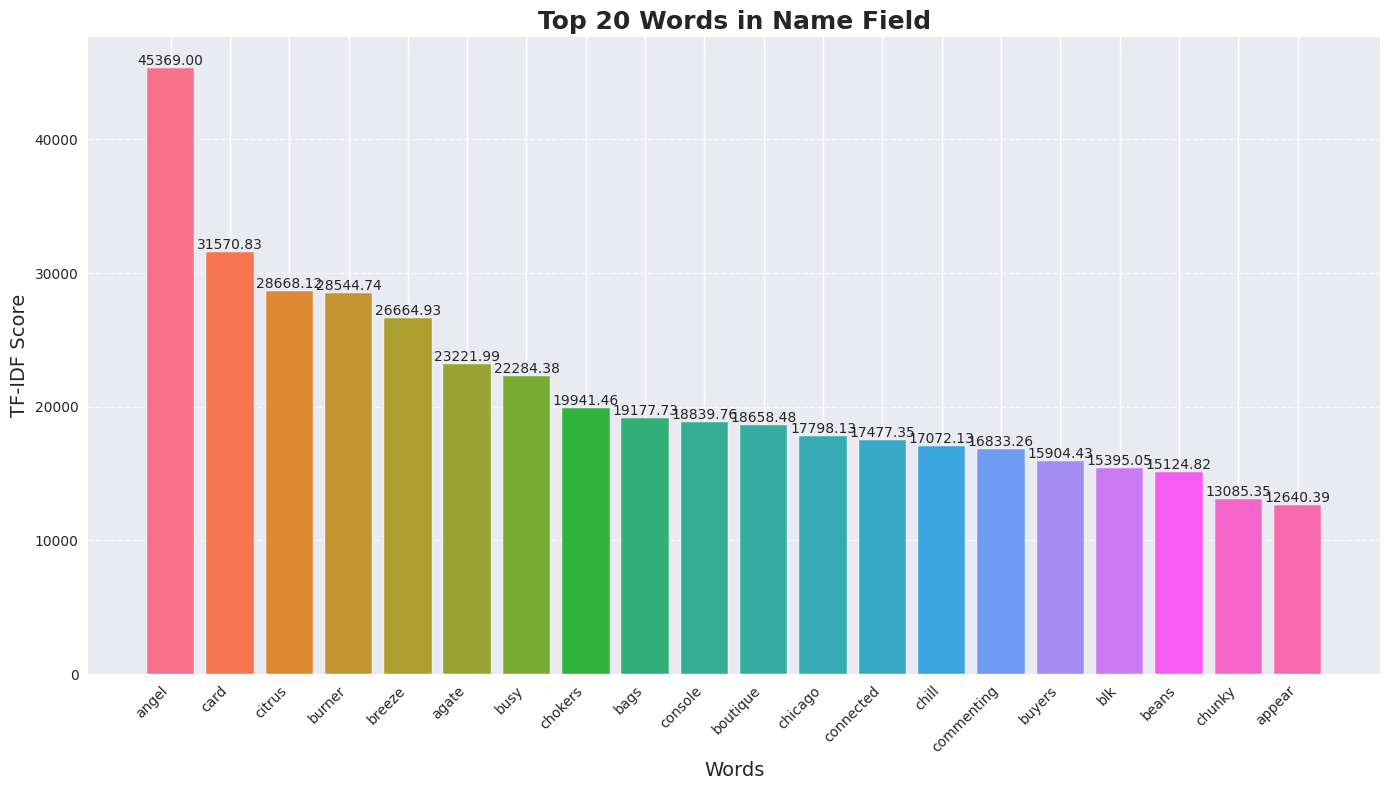

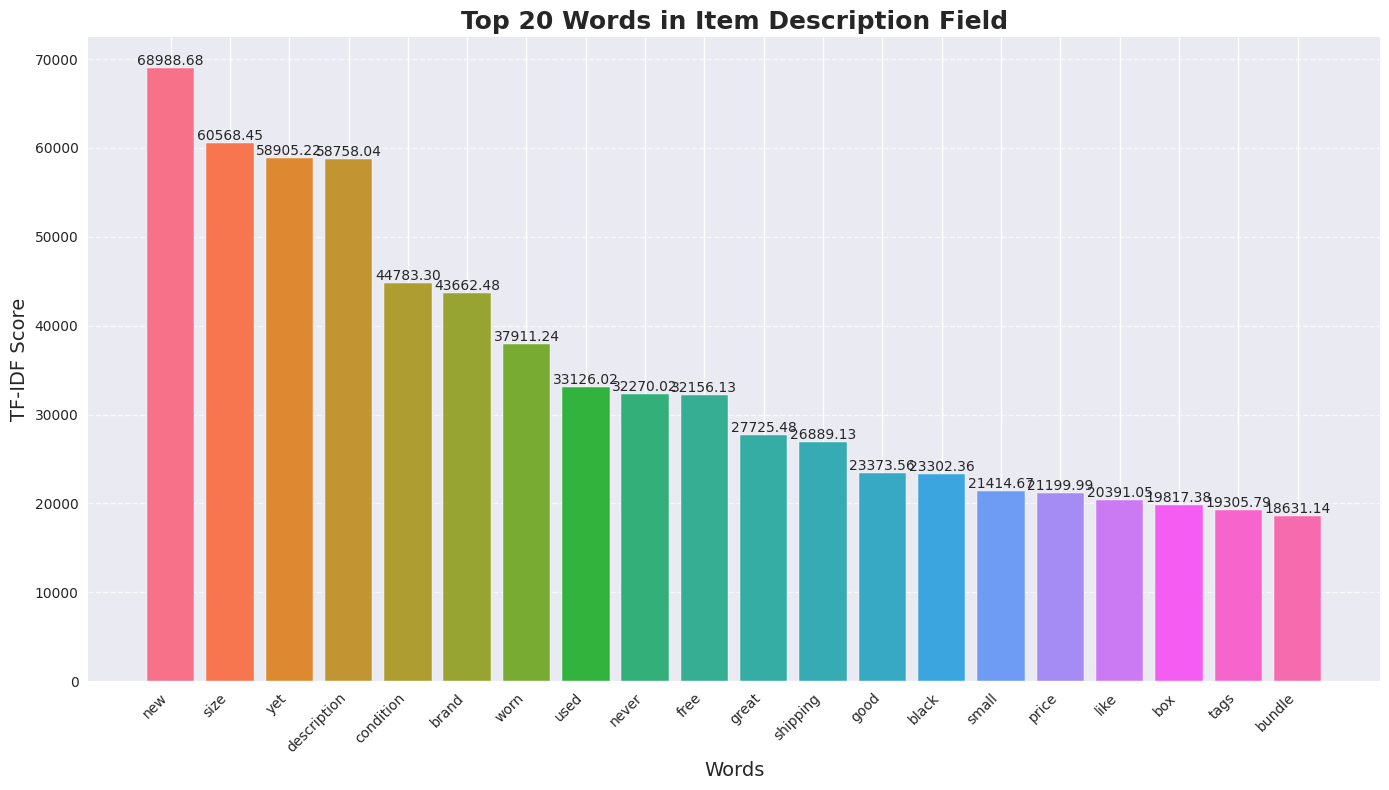

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 스타일 설정
plt.style.use('seaborn')
sns.set_palette("husl")

# 그래프 생성 함수
def create_word_frequency_graph(tfidf_matrix, feature_names, title, n_top_words=20):
    tfidf_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
    top_indices = tfidf_sums.argsort()[-n_top_words:][::-1]

    top_words = [feature_names[i] for i in top_indices]
    top_tfidf = tfidf_sums[top_indices]

    fig, ax = plt.subplots(figsize=(14, 8))
    bars = ax.bar(range(n_top_words), top_tfidf, color=sns.color_palette("husl", n_top_words))

    # 막대 위에 값 표시
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', rotation=0)

    plt.xticks(range(n_top_words), top_words, rotation=45, ha='right')
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('TF-IDF Score', fontsize=14)
    plt.title(title, fontsize=18, fontweight='bold')

    # 격자 추가
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

# 'name' 필드에 대한 그래프 생성
create_word_frequency_graph(df_name_tfidf, vectorizer1.get_feature_names_out(),
                            "Top 20 Words in Name Field")

# 'item_description' 필드에 대한 그래프 생성
create_word_frequency_graph(df_id_tfidf, vectorizer1.get_feature_names_out(),
                            "Top 20 Words in Item Description Field")

# 모델링

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from scipy.sparse import hstack
import lightgbm as lgb
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import uniform, randint
from sklearn.feature_selection import SelectKBest, f_regression
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [55]:
# 레이블 인코딩 함수
def label_encode(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col].astype(str))
    return df, le

# RMSLE 계산 함수
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


In [56]:
# 데이터 로드
train = pd.read_csv('train.tsv', sep='\t')
test = pd.read_csv('test.tsv', sep='\t')
test_stg2 = pd.read_csv('test_stg2.tsv', sep='\t')

# 전처리
for df in [train, test, test_stg2]:
    df['category_name'] = df['category_name'].fillna('Unknown/Unknown/Unknown')
    df[['category1', 'category2', 'category3']] = df['category_name'].str.split('/', n=2, expand=True)
    df[['category1', 'category2', 'category3']] = df[['category1', 'category2', 'category3']].fillna('Unknown')
    df = df.drop(columns=['category_name'])
    df['brand_name'] = df['brand_name'].fillna('No Brand')
    df['item_description'] = df['item_description'].fillna('No description')
    
    for col in ['name', 'item_description', 'brand_name', 'category1', 'category2', 'category3']:
        df[col] = df[col].apply(preprocess)


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def robust_label_encode(train, test, test_stg2, categorical_cols):
    le_dict = {}
    for col in categorical_cols:
        le = LabelEncoder()
        
        # 모든 데이터셋의 유니크한 값을 결합
        unique_values = pd.concat([
            train[col], 
            test[col], 
            test_stg2[col]
        ]).unique().tolist()
        
        # 'Unknown' 추가
        unique_values.append('Unknown')
        
        # 레이블 인코더 학습
        le.fit(unique_values)
        
        # 각 데이터셋에 레이블 인코딩 적용
        train[col] = le.transform(train[col].fillna('Unknown'))
        test[col] = le.transform(test[col].fillna('Unknown'))
        test_stg2[col] = le.transform(test_stg2[col].fillna('Unknown'))
        
        le_dict[col] = le
    
    return train, test, test_stg2, le_dict

# 이상치 제거 (훈련 데이터만)
train = train[train['price'] > 0]

# 레이블 인코딩
categorical_cols = ['brand_name', 'category1', 'category2', 'category3']
train, test, test_stg2, le_dict = robust_label_encode(train, test, test_stg2, categorical_cols)

print("Label encoding completed successfully.")

Label encoding completed successfully.


In [58]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def preprocess_text(df, text_columns):
    for col in text_columns:
        df[col] = df[col].fillna('').astype(str)
    return df

# 텍스트 전처리 함수 적용
text_columns = ['name', 'item_description']
train = preprocess_text(train, text_columns)
test = preprocess_text(test, text_columns)
test_stg2 = preprocess_text(test_stg2, text_columns)

# TF-IDF 벡터화
vectorizer_name = TfidfVectorizer(max_features=1000)
vectorizer_desc = TfidfVectorizer(min_df=10, max_features=5000)

# 훈련 데이터 벡터화
train_name_tfidf = vectorizer_name.fit_transform(train['name'])
train_id_tfidf = vectorizer_desc.fit_transform(train['item_description'])

# 테스트 데이터 벡터화
test_name_tfidf = vectorizer_name.transform(test['name'])
test_id_tfidf = vectorizer_desc.transform(test['item_description'])

# 2단계 테스트 데이터 벡터화
test_stg2_name_tfidf = vectorizer_name.transform(test_stg2['name'])
test_stg2_id_tfidf = vectorizer_desc.transform(test_stg2['item_description'])

print("TF-IDF vectorization completed successfully.")

TF-IDF vectorization completed successfully.


In [63]:
import numpy as np
import pandas as pd
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# 특성 결합
X = hstack([train_name_tfidf, train_id_tfidf, train[categorical_cols]])
X_test = hstack([test_name_tfidf, test_id_tfidf, test[categorical_cols]])
X_test_stg2 = hstack([test_stg2_name_tfidf, test_stg2_id_tfidf, test_stg2[categorical_cols]])
y = train['price'].values

# 특성 선택 (특성 수를 줄여 속도 향상)
selector = SelectKBest(f_regression, k=500)
X_selected = selector.fit_transform(X, y)
X_test_selected = selector.transform(X_test)
X_test_stg2_selected = selector.transform(X_test_stg2)

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 모델 및 하이퍼파라미터 정의
models = {
    'Ridge': (Ridge(), {
        'alpha': uniform(0.1, 10)
    }),
    'XGBoost': (xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0, random_state=42), {
        'n_estimators': randint(100, 300),
        'max_depth': randint(3, 8),
        'learning_rate': uniform(0.01, 0.2),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4)
    })
}

# 모델 학습 및 예측
predictions = {}
predictions_stg2 = {}

for name, (model, params) in models.items():
    print(f"Tuning {name}...")
    
    random_search = RandomizedSearchCV(
        model, params, n_iter=10, cv=3, 
        scoring='neg_mean_squared_log_error', 
        n_jobs=-1, random_state=42, verbose=1
    )
    
    random_search.fit(X_train, np.log1p(y_train))
    
    best_model = random_search.best_estimator_
    
    val_pred = np.expm1(best_model.predict(X_val))
    test_pred = np.expm1(best_model.predict(X_test_selected))
    test_stg2_pred = np.expm1(best_model.predict(X_test_stg2_selected))
    
    print(f"{name} RMSLE: {rmsle(y_val, val_pred)}")
    print(f"Best parameters: {random_search.best_params_}")
    
    predictions[name] = test_pred
    predictions_stg2[name] = test_stg2_pred

# 앙상블 (단순 평균)
ensemble_pred = np.mean(list(predictions.values()), axis=0)
ensemble_pred_stg2 = np.mean(list(predictions_stg2.values()), axis=0)

# # Submission 파일 생성
# submission = pd.read_csv('sample_submission.csv')
# submission['price'] = ensemble_pred
# submission.to_csv('ensemble_submission.csv', index=False)

# submission_stg2 = pd.read_csv('sample_submission_stg2.csv')
# submission_stg2['price'] = ensemble_pred_stg2
# submission_stg2.to_csv('ensemble_submission_stg2.csv', index=False)

# print("Submission files created: ensemble_submission.csv and ensemble_submission_stg2.csv")

Tuning Ridge...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Ridge RMSLE: 0.6626187729281307
Best parameters: {'alpha': 0.6808361216819946}
Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:32:23] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:32:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:32:23] WARNING: /workspace/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [23:32:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist

XGBoost RMSLE: 0.5872717449871939
Best parameters: {'colsample_bytree': 0.749816047538945, 'learning_rate': 0.20014286128198325, 'max_depth': 5, 'n_estimators': 171, 'subsample': 0.8394633936788146}
